In [38]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

In [39]:
df = pd.read_csv('Algerian_forest_fires_dataset.csv')

In [40]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [42]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,127,9
top,1,7,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


### EDA and feature engineering

In [43]:
### doing df['Classes']
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [44]:
df_copy = df

In [45]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [46]:
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [47]:
df_copy.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0


In [48]:
df_copy[df_copy.isnull().any(axis = 1)]


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [49]:
df.loc[:122,"Region"] =0
df.loc[122:,"Region"]=1 

In [50]:
df_copy.shape

(247, 15)

In [51]:
df_copy.drop(index = 122,inplace = True)

In [52]:
df.drop(index = 123,inplace = True)

In [53]:
df_copy.shape

(245, 15)

In [54]:
df_copy.reset_index(drop = False)

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0,0.0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0,0.0
4,4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,1,1.0
241,243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,0,1.0
242,244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1.0
243,245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1.0


In [55]:
df_copy.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [56]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 245 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          245 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4   RH           245 non-null    object 
 5   Ws           245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      245 non-null    int32  
 14  Region       245 non-null    float64
dtypes: float64(1), int32(1), object(13)
memory usage: 29.7+ KB


In [57]:
df_copy[['day','month','year','Temperature','RH','Ws']] = df_copy[['day','month','year','Temperature','RH','Ws']].apply(pd.to_numeric,errors ='coerce')

In [58]:
df_copy.fillna(0 ,inplace = True)

In [59]:
df_copy[['day','month','year','Temperature','RH','Ws']] = df_copy[['day','month','year','Temperature','RH','Ws']].astype(int)

In [60]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 245 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          245 non-null    int32  
 1   month        245 non-null    int32  
 2   year         245 non-null    int32  
 3   Temperature  245 non-null    int32  
 4   RH           245 non-null    int32  
 5   Ws           245 non-null    int32  
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      245 non-null    int32  
 14  Region       245 non-null    float64
dtypes: float64(1), int32(7), object(7)
memory usage: 23.9+ KB


In [61]:
objects = [column for column in df.columns if df_copy[column].dtype == 'O'] 

In [62]:
### Converting the rest of the dataset into float
df_copy[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']]= df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']].apply(pd.to_numeric,errors = 'coerce')

In [63]:
df_copy.fillna(0, inplace = True)

In [64]:
df_copy[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']] = df_copy[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']].astype(float)

In [65]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 245 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          245 non-null    int32  
 1   month        245 non-null    int32  
 2   year         245 non-null    int32  
 3   Temperature  245 non-null    int32  
 4   RH           245 non-null    int32  
 5   Ws           245 non-null    int32  
 6   Rain         245 non-null    float64
 7   FFMC         245 non-null    float64
 8   DMC          245 non-null    float64
 9   DC           245 non-null    float64
 10  ISI          245 non-null    float64
 11  BUI          245 non-null    float64
 12  FWI          245 non-null    float64
 13  Classes      245 non-null    int32  
 14  Region       245 non-null    float64
dtypes: float64(8), int32(7)
memory usage: 23.9 KB


In [66]:
df_copy.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000
mean,15.689796,7.469388,2003.787755,32.040816,61.685714,15.440816,0.757551,77.569796,14.613469,49.027347,4.754694,16.596735,6.977959,0.563265,0.502041
std,8.864283,1.209627,128.541965,4.168378,15.371733,2.974200,1.995896,15.148751,12.378218,47.678626,4.177902,14.215611,7.437114,0.496997,0.501019
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,7.000000,2012.000000,30.000000,52.000000,14.000000,0.000000,71.400000,5.800000,10.400000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,16.000000,7.000000,2012.000000,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.100000,4.200000,1.000000,1.000000
75%,23.000000,8.000000,2012.000000,35.000000,73.000000,17.000000,0.500000,88.300000,20.700000,67.200000,7.300000,22.400000,11.300000,1.000000,1.000000
max,31.000000,9.000000,2012.000000,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


In [67]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


array([[<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'Temperature'}>],
       [<Axes: title={'center': 'RH'}>, <Axes: title={'center': 'Ws'}>,
        <Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'FFMC'}>],
       [<Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>,
        <Axes: title={'center': 'ISI'}>, <Axes: title={'center': 'BUI'}>],
       [<Axes: title={'center': 'FWI'}>,
        <Axes: title={'center': 'Classes'}>,
        <Axes: title={'center': 'Region'}>, <Axes: >]], dtype=object)

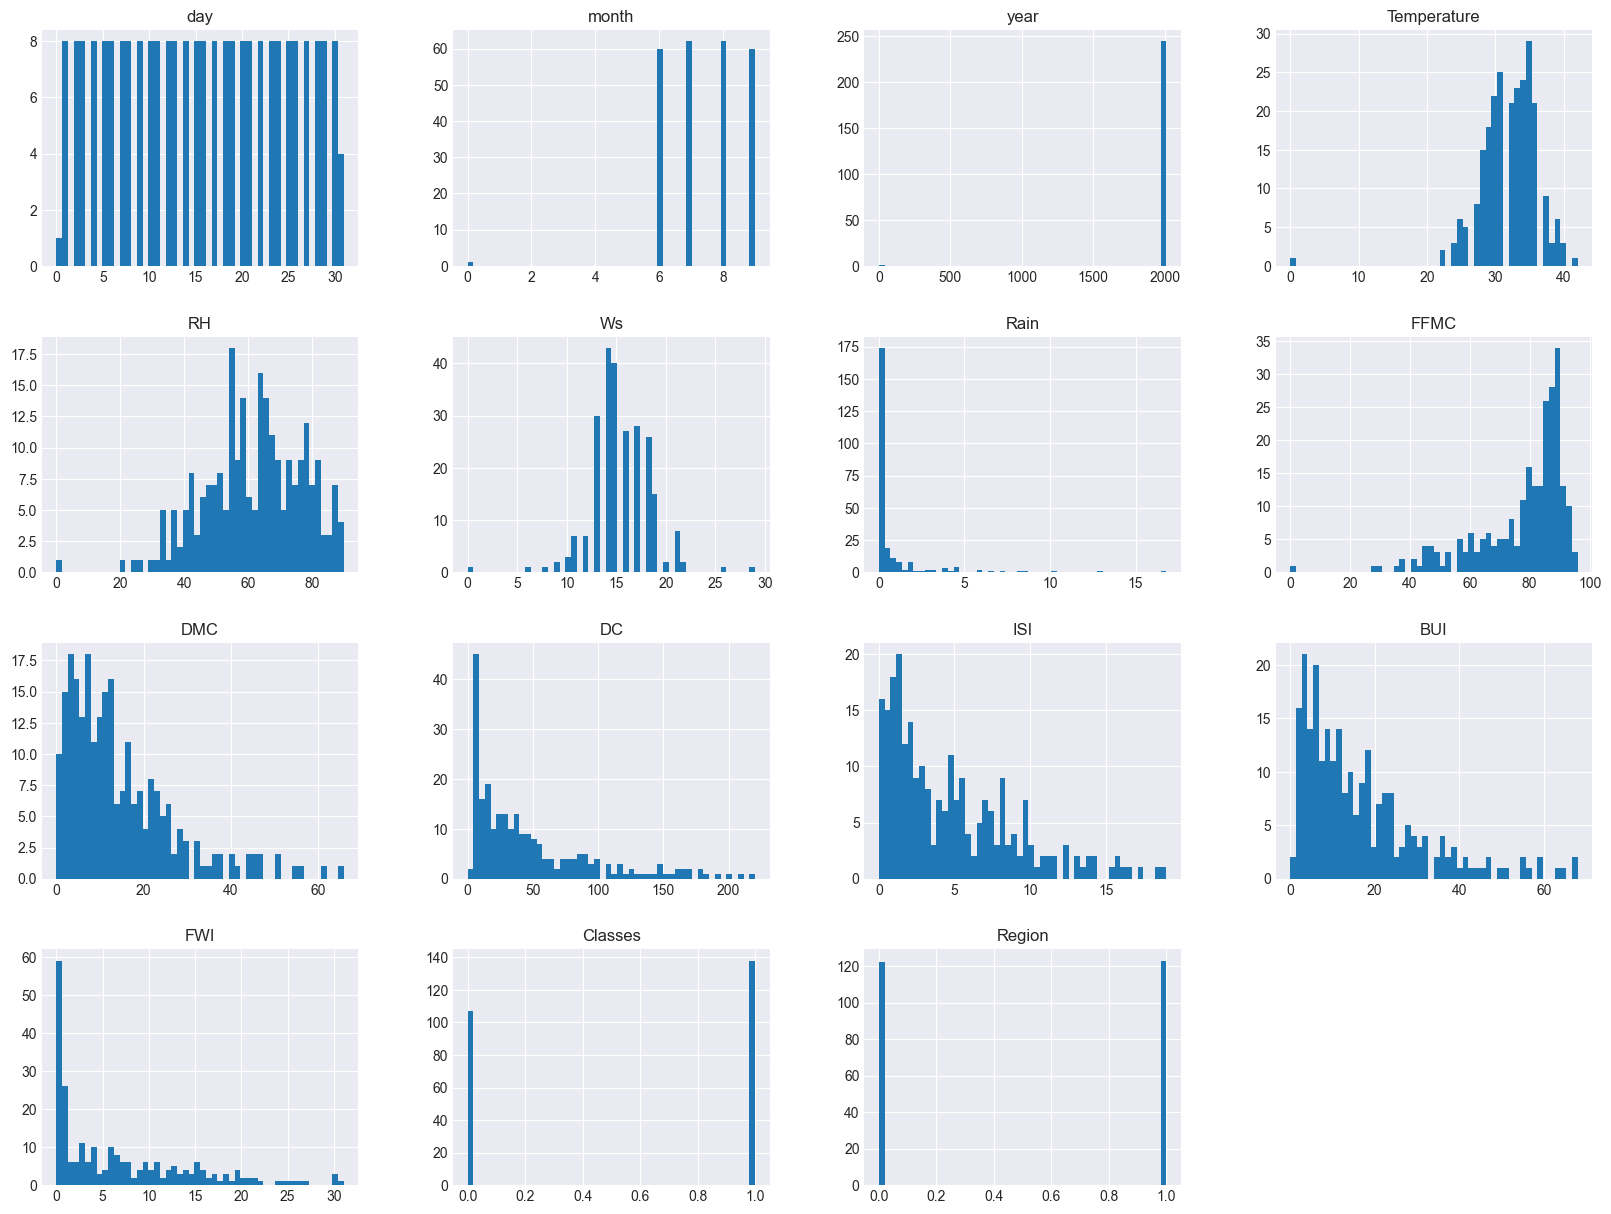

In [68]:
### visualisation
import seaborn as sns 
plt.style.use('seaborn-v0_8-darkgrid')
df_copy.hist(bins = 50,figsize = (20,15))

In [69]:
df_copy.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [70]:
corr = df_copy.corr()
corr

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000,0.044977,0.113545,0.138769,-0.042015,0.081846,-0.108742,0.247529,0.495589,0.530529,0.184395,0.520945,0.354815,0.195180,-0.007239
month,0.044977,1.000000,0.396120,0.148181,0.068359,0.096039,0.042068,0.143626,0.092421,0.143491,0.085403,0.108247,0.101015,0.001530,-0.025256
year,0.113545,0.396120,1.000000,0.493094,0.257428,0.333038,0.024348,0.328480,0.075734,0.065964,0.073006,0.074895,0.060189,-0.056371,-0.063758
Temperature,0.138769,0.148181,0.493094,1.000000,-0.423226,-0.063936,-0.272205,0.718667,0.456426,0.352339,0.563143,0.432095,0.514586,0.412211,0.206012
RH,-0.042015,0.068359,0.257428,-0.423226,1.000000,0.300837,0.221658,-0.504718,-0.370859,-0.193188,-0.646786,-0.316613,-0.534293,-0.420382,-0.408340
Ws,0.081846,0.096039,0.333038,-0.063936,0.300837,1.000000,0.168516,-0.035997,0.024051,0.092572,0.038653,0.052921,0.047151,-0.088259,-0.187629
Rain,-0.108742,0.042068,0.024348,-0.272205,0.221658,0.168516,1.000000,-0.505706,-0.285790,-0.293782,-0.344299,-0.296419,-0.320536,-0.377389,-0.042537
FFMC,0.247529,0.143626,0.328480,0.718667,-0.504718,-0.035997,-0.505706,1.000000,0.592208,0.495140,0.720800,0.579970,0.666562,0.700945,0.190838
DMC,0.495589,0.092421,0.075734,0.456426,-0.370859,0.024051,-0.285790,0.592208,1.000000,0.875152,0.676296,0.982175,0.875243,0.577881,0.185329
DC,0.530529,0.143491,0.065964,0.352339,-0.193188,0.092572,-0.293782,0.495140,0.875152,1.000000,0.498438,0.941667,0.741572,0.507818,-0.086515


<Axes: >

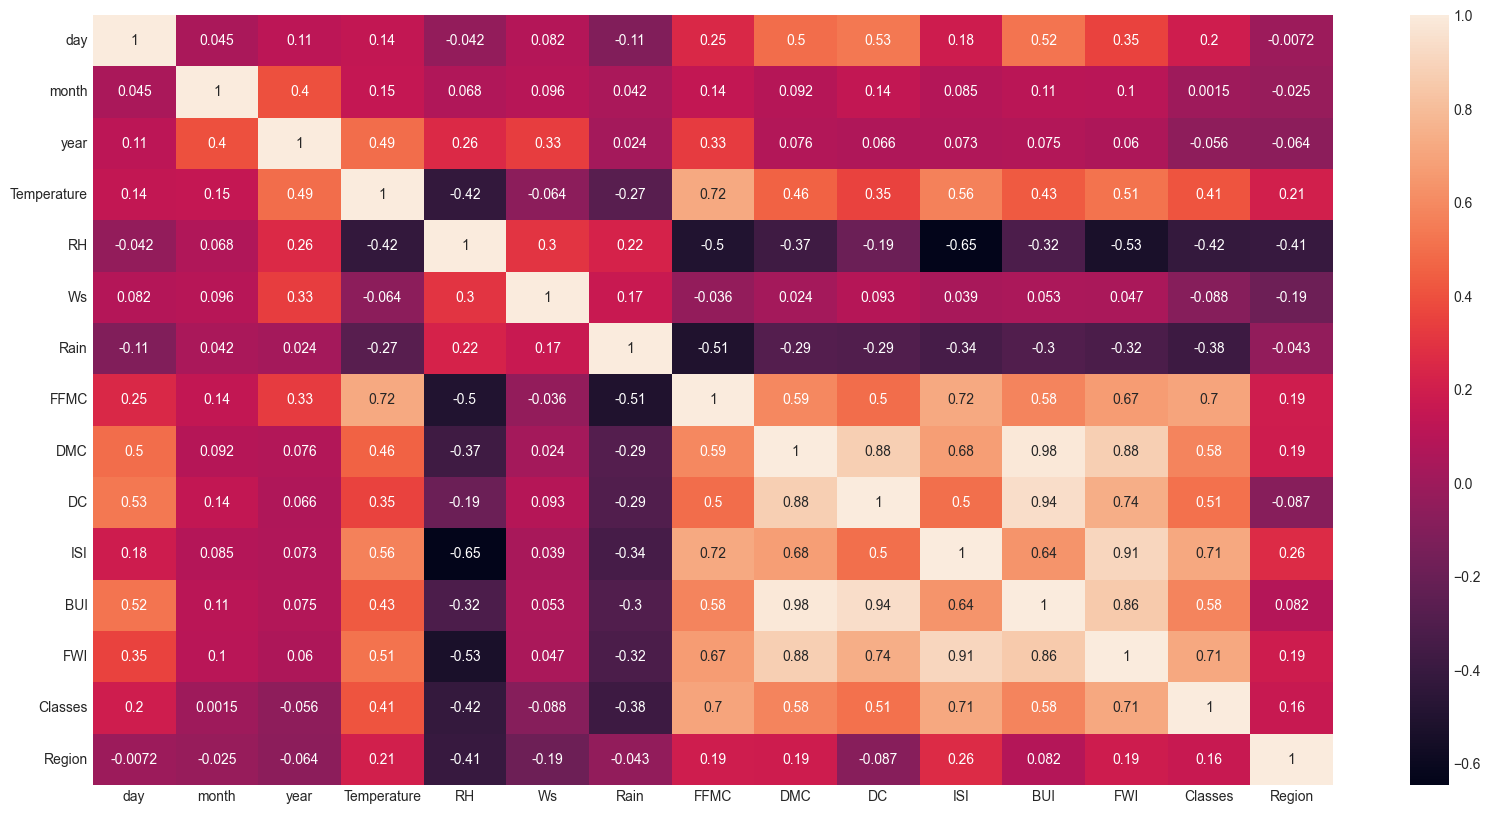

In [81]:
plt.figure(figsize = (20,10))
sns.heatmap(corr,annot  = True)

In [72]:

percentage = df['Classes'].value_counts(normalize=True)*100

([<matplotlib.patches.Wedge at 0x1faa1cfe810>,
 [Text(-0.21719268158403732, 1.0783447218150304, 'Fire'),
  Text(0.21719278254595595, -1.0783447014799792, 'Not Fire')],
 [Text(-0.11846873540947489, 0.5881880300809256, '56.3%'),
  Text(0.11846879047961233, -0.5881880189890795, '43.7%')])

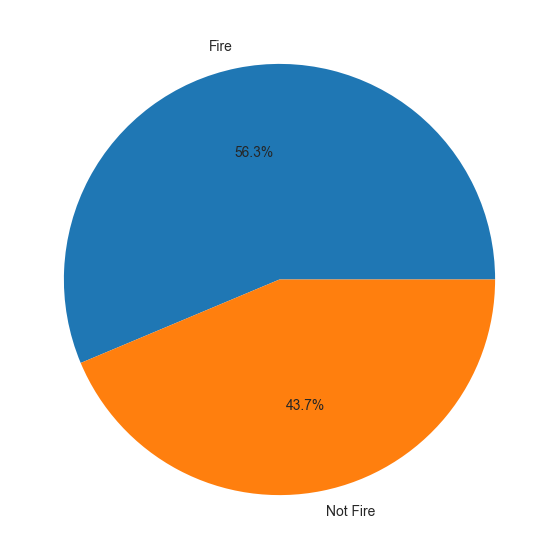

In [73]:
classlabels = ['Fire','Not Fire']
plt.figure(figsize = (12,7))
plt.pie(percentage,labels = classlabels,autopct='%1.1f%%')

In [74]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1.0
243,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1.0
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1.0
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1.0


<Axes: xlabel='month', ylabel='count'>

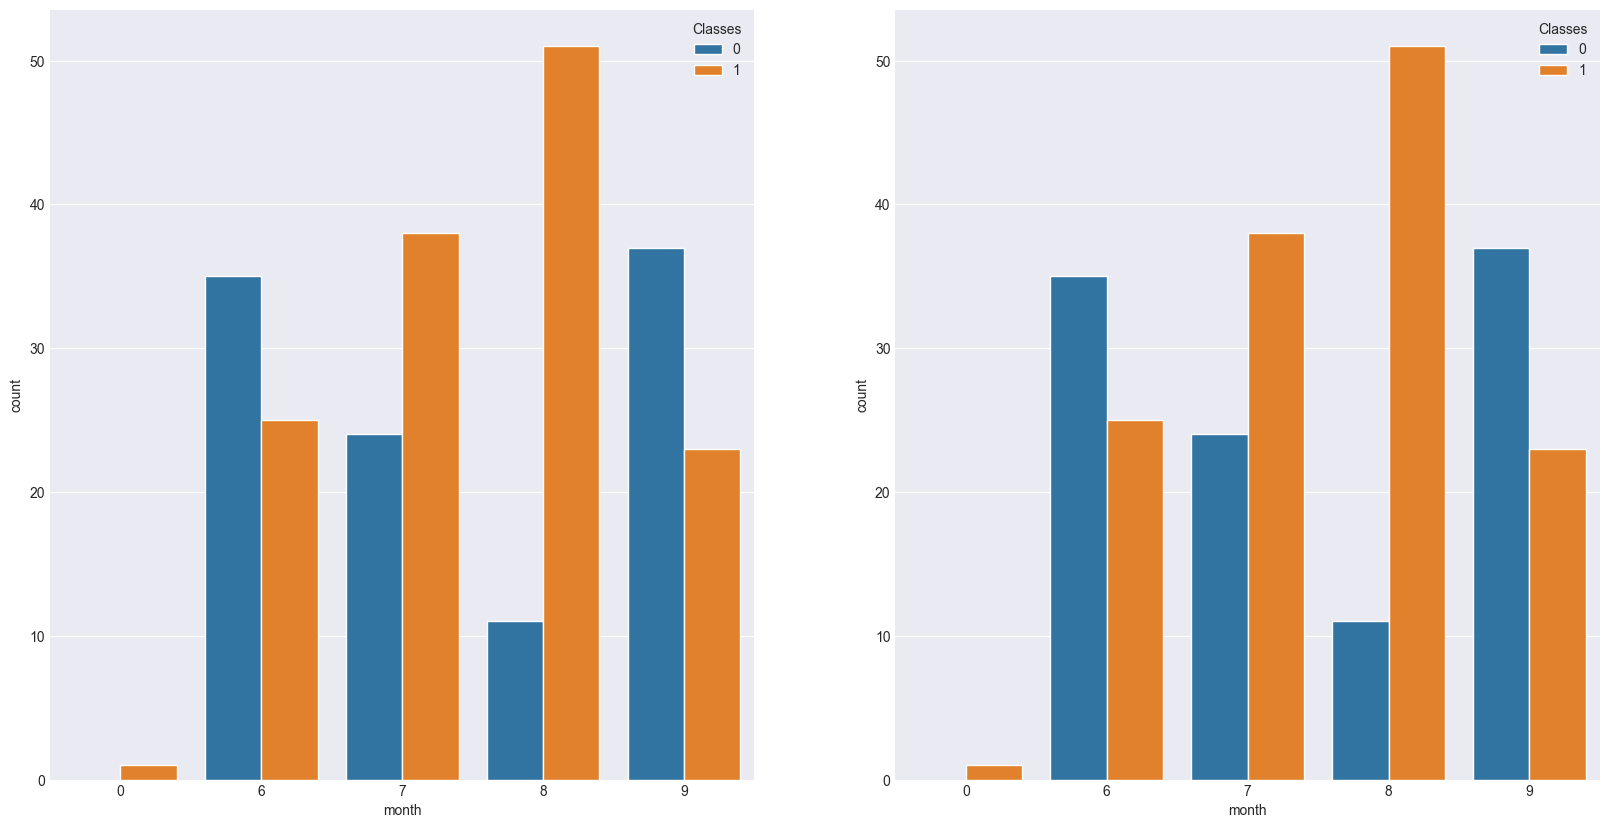

In [80]:
### identifying which month to be most fire
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
dftemp1 =[df['Region'] == 0]
sns.set_style('darkgrid')
sns.countplot(x ='month' , hue = 'Classes',data = df_copy)
plt.subplot(1,2,2)
dftemp2 = [df['Region'] == 1]
sns.set_style('darkgrid')
sns.countplot(x = 'month' , hue = 'Classes', data = df_copy)